# Capstone Project Part 1: Building a Streaming Platform Recommender Using Classification Models (EDA)

## Import libraries and load CSV dataset

In [63]:
#importing necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
#load CSV data all_platform_titles.csv
streaming_platform_data_df = pd.read_csv('data/all_platform_titles.csv')

In [65]:
#checking the column names and values
streaming_platform_data_df.head()

id                              title   type  \
0  ts381979  MH370: The Plane That Disappeared   SHOW   
1   tm82169                              Rocky  MOVIE   
2   tm17823                             Grease  MOVIE   
3  tm191099                          The Sting  MOVIE   
4   tm69975                           Rocky II  MOVIE   

                                         description  release_year  \
0  In 2014, a plane with 239 people aboard vanish...          2023   
1  When world heavyweight boxing champion, Apollo...          1976   
2  Australian good girl Sandy and greaser Danny f...          1978   
3  A novice con man teams up with an acknowledged...          1973   
4  After Rocky goes the distance with champ Apoll...          1979   

  age_certification  runtime                                 genres  \
0             TV-MA       90                      ['documentation']   
1                PG      119                     ['drama', 'sport']   
2                PG      110                  ['romance', 'comedy']   
3                PG      129  ['crime', 'drama', 'comedy', 'music']   
4                PG      119                     ['drama', 'sport']   

  production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0               ['GB']      1.0  tt26739535         6.5         NaN   
1               ['US']      NaN   tt0075148         8.1    588100.0   
2               ['US']      NaN   tt0077631         7.2    283316.0   
3               ['US']      NaN   tt0070735         8.3    266738.0   
4               ['US']      NaN   tt0079817         7.3    216307.0   

   tmdb_popularity  tmdb_score platform  
0           17.709         NaN  Netflix  
1          106.361       7.782  Netflix  
2           33.160       7.406  Netflix  
3           24.616       8.020  Netflix  
4           75.699       7.246  Netflix

## Exploratory data analysis (EDA)
Creating charts and visualizations which helps to explain the reason and logic on how some user preference ratings are classified into Netflix, Disney+ or Amazon Prime Video.

## Charts
1. [Average IMDb Ratings Between Platforms](#1.-Average-IMDb-Ratings-Between-Platforms)
2. [Number of Asian Titles Between Platforms](#2.-Number-of-Asian-Titles-Between-Platforms)
3. [Number of Japanese Anime Titles Between Platforms](#3.-Number-of-Japanese-Anime-Titles-Between-Platforms)
4. [Number of US Animation Titles Between Platforms](#4.-Number-of-US-Animation-Titles-Between-Platforms)
5. [Number of Documentaries Between Platforms](#5.-Number-of-Documentaries-Between-Platforms)
6. [Total Number of Titles Between Platforms](#6.-Total-Number-of-Titles-Between-Platforms)
7. [Number of Titles Released Before Year 2000 Between Platforms](#7.-Number-of-Titles-Released-Before-Year-2000-Between-Platforms)

#### **1. Average IMDb Ratings Between Platforms**

platform
Amazon Prime Video    5.973558
Disney+               6.614941
Netflix               6.538732
Name: imdb_score, dtype: float64


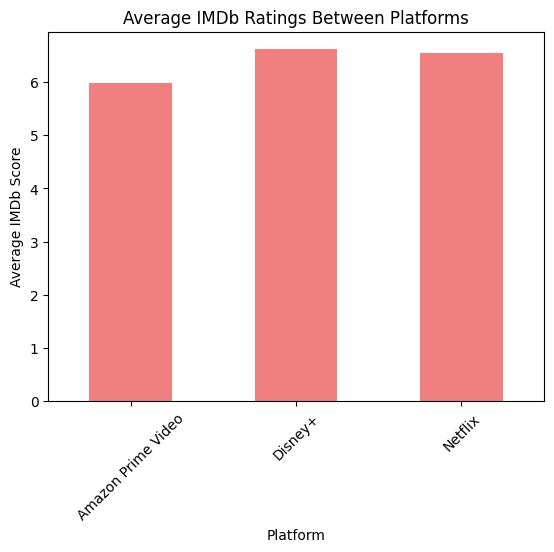

In [72]:
# Group by platform and calculate the mean IMDb score for each platform
platform_avg_imdb = streaming_platform_data_df.groupby('platform')['imdb_score'].mean()

# Print the average IMDb score per platform
print(platform_avg_imdb)

# Create a bar chart to visualize the average IMDb score per platform
platform_avg_imdb.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Ratings Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Disney+ is the platform with the highest average IMDb ratings. Hence, users who rate average IMDb ratings highly should be classified and recommended to Disney+.

#### **2. Number of Asian Titles Between Platforms**

platform
Amazon Prime Video    526
Disney+                24
Netflix               676
Name: id, dtype: int64


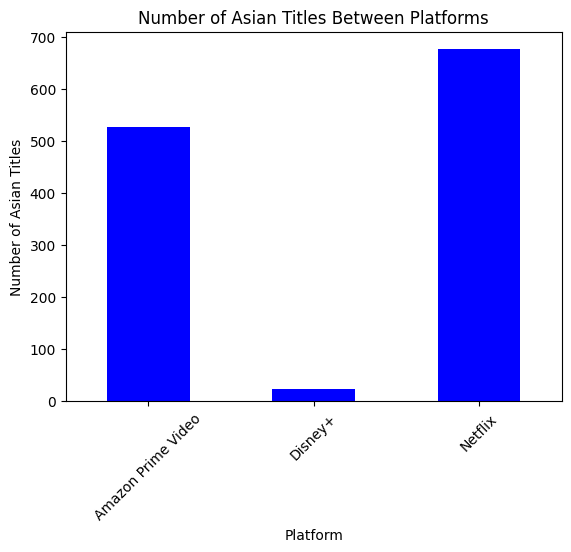

In [76]:
# Filter the dataframe for titles produced in South Korea (KR), Japan (JP), or China (CN)
df_filtered_countries = streaming_platform_data_df[streaming_platform_data_df['production_countries'].str.contains('KR|JP|CN', case=False, na=False)]

# Group by platform and count the number of titles for KR, JP, or CN
platform_country_counts = df_filtered_countries.groupby('platform')['id'].count()

# Print the number of titles per platform
print(platform_country_counts)

# Create a bar chart to visualize the number of titles per platform for KR, JP, CN
platform_country_counts.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Number of Asian Titles')
plt.title('Number of Asian Titles Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Netflix is the platform with the highest number of Asian Titles. Hence, users who rate number of Asian Titles highly should be classified and recommended to Netflix.

#### **3. Number of Japanese Anime Titles Between Platforms**

platform
Amazon Prime Video    112
Disney+                 6
Netflix               183
Name: id, dtype: int64


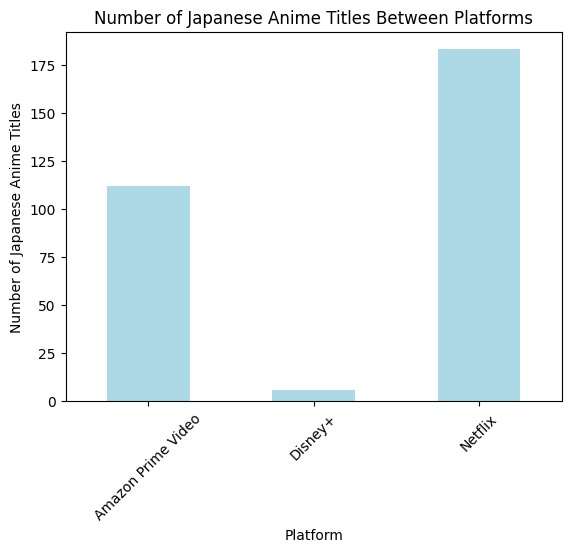

In [110]:
# Filter the dataframe for titles where the genre is 'Animation' and the production country is 'JP'
df_filtered_animation_jp = streaming_platform_data_df[streaming_platform_data_df['genres'].str.contains('animation', case=False, na=False) & 
                                                      streaming_platform_data_df['production_countries'].str.contains('JP', case=False, na=False)]

# Group by platform and count the number of titles
platform_animation_jp_counts = df_filtered_animation_jp.groupby('platform')['id'].count()

# Print the number of titles per platform
print(platform_animation_jp_counts)

# Create a bar chart to visualize the number of animation titles produced in Japan per platform
platform_animation_jp_counts.plot(kind='bar', color='lightblue')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Number of Japanese Anime Titles')
plt.title('Number of Japanese Anime Titles Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Netflix is the platform with the highest number of Japanese Anime Titles. Hence, users who rate number of Japanese Anime Titles highly should be classified and recommended to Netflix.

#### **4. Number of US Animation Titles Between Platforms**

platform
Amazon Prime Video    236
Disney+               517
Netflix               314
Name: id, dtype: int64


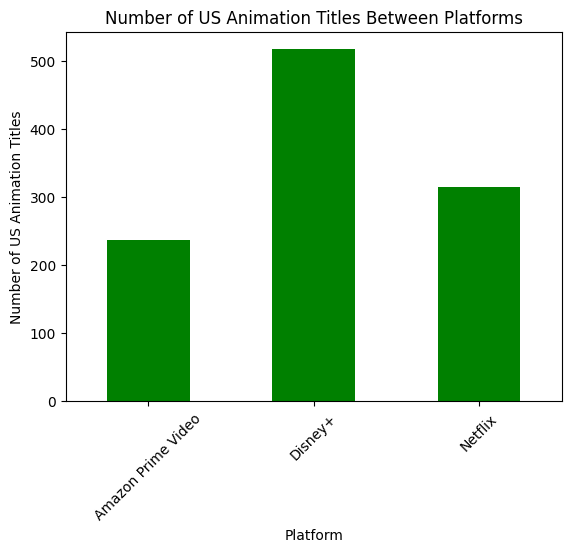

In [111]:
# Filter the dataframe for titles where the genre is 'animation' and the production country is 'US'
df_filtered_animation_us = streaming_platform_data_df[streaming_platform_data_df['genres'].str.contains('animation', case=False, na=False) & 
                                                      streaming_platform_data_df['production_countries'].str.contains('US', case=False, na=False)]

# Group by platform and count the number of titles
platform_animation_us_counts = df_filtered_animation_us.groupby('platform')['id'].count()

# Print the number of titles per platform
print(platform_animation_us_counts)

# Create a bar chart to visualize the number of animation titles produced in the US per platform
platform_animation_us_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Number of US Animation Titles')
plt.title('Number of US Animation Titles Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Disney+ is the platform with the highest number of US Animation Titles. Hence, users who rate number of US Animation Titles highly should be classified and recommended to Disney+.

#### **5. Number of Documentaries Between Platforms**

platform
Amazon Prime Video    1286
Disney+                520
Netflix               1012
Name: id, dtype: int64


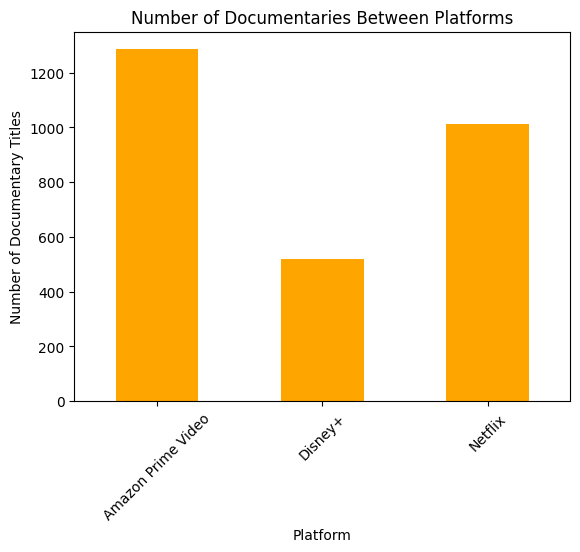

In [113]:
# Filter the dataframe for titles where 'documentation' is in the genres column
df_documentaries = streaming_platform_data_df[streaming_platform_data_df['genres'].str.contains('documentation', case=False, na=False)]

# Group by platform and count the number of documentary titles
platform_doc_counts = df_documentaries.groupby('platform')['id'].count()

# Print the total number of documentary titles per platform
print(platform_doc_counts)

# Create a bar chart to visualize the number of documentary titles per platform
platform_doc_counts.plot(kind='bar', color='orange')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Number of Documentary Titles')
plt.title('Number of Documentaries Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Amazon Prime Video is the platform with the highest number of Documentaries. Hence, users who rate number of Documentaries highly should be classified and recommended to Amazon Prime Video.

#### **6. Total Number of Titles Between Platforms**

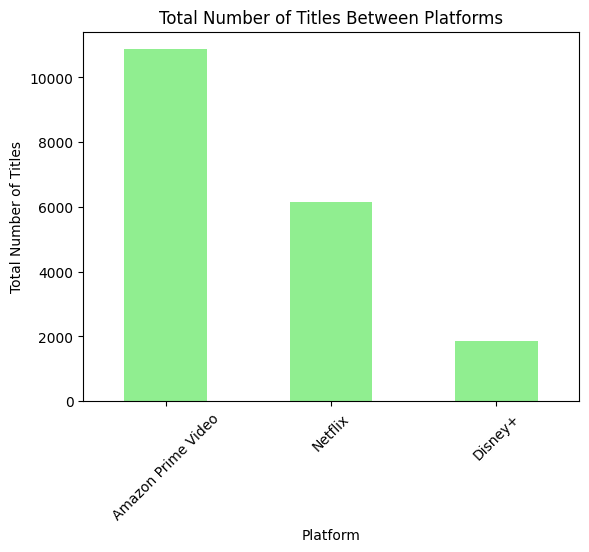

In [114]:
# Count the number of titles per platform
platform_counts = streaming_platform_data_df['platform'].value_counts()

# Create bar chart
platform_counts.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Total Number of Titles')
plt.title('Total Number of Titles Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Amazon Prime Video is the platform with the highest Total Number of Titles. Hence, users who rate Total Number of Titles highly should be classified and recommended to Amazon Prime Video.

#### **7. Number of Titles Released Before Year 2000 Between Platforms**

platform
Amazon Prime Video    2503
Disney+                400
Netflix                175
Name: id, dtype: int64


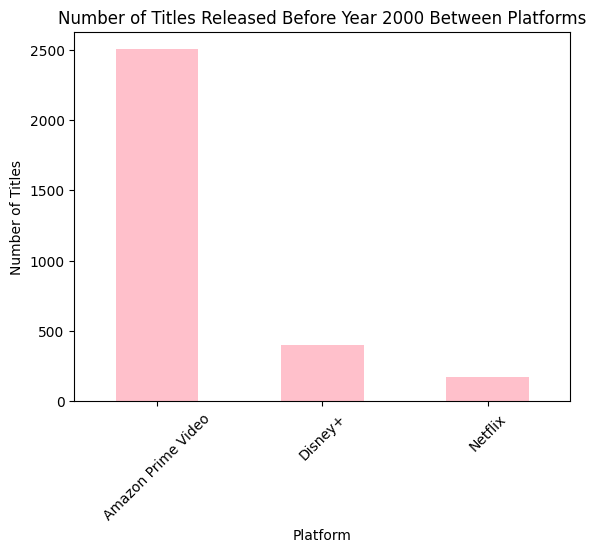

In [116]:
# Filter the dataframe to include only titles released before 2000
df_filtered = streaming_platform_data_df[streaming_platform_data_df['release_year'] < 2000]

# Group by platform and count the number of titles
platform_counts = df_filtered.groupby('platform')['id'].count()

# Print the total number of titles per platform
print(platform_counts)

# Create a bar chart to visualize the total number of titles per platform
platform_counts.plot(kind='bar', color='pink')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Before Year 2000 Between Platforms')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Results: Amazon Prime Video is the platform with the highest Number of Titles Released Before Year 2000. Hence, users who rate Number of Titles Released Before Year 2000 highly should be classified and recommended to Amazon Prime Video.

## Other citations and links
Links and citations to help explain the reasoning for the other variables like Price, Original Titles, Superhero Titles and Platform Popularity

1. https://www.imdb.com/list/ls507648872/
2. https://www.imdb.com/list/ls098565773/
3. https://www.whats-on-netflix.com/library/originals/
4. https://www.imdb.com/list/ls095817432/?view=detailed&sort=user_rating%2Cdesc
5. https://www.imdb.com/list/ls098575307/
6. https://flixpatrol.com/streaming-services/subscribers/singapore/
7. https://www.yaguara.co/amazon-prime-statistics/
8. https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows
9. 
https://www.kaggle.com/datasets/dgoenrique/disney-movies-and-tv-show
10. 
https://www.kaggle.com/datasets/dgoenrique/amazon-prime-movies-and-tv-shos
